In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import time
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import networkx as nx
from tqdm.notebook import tqdm

warnings.filterwarnings('ignore')

    def dimensionality_reduction(self, n_components=2, features_type='connectome', plot_targets=None):
        """
        Perform dimensionality reduction on the dataset
        
        Parameters:
        -----------
        n_components : int
            Number of components for PCA
        features_type : str
            Type of features to use ('connectome', 'survey', or 'all')
        plot_targets : list
            List of target columns to color the plot by
        """
        if self.combined_df is None and features_type == 'all':
            print("Error: No combined dataset available for 'all' features. Run combine_datasets() first.")
            return
            
        start_time = time.time()
        
        # Select features based on type
        if features_type == 'connectome':
            if self.connectome_df is None:
                print("Error: No connectome data available")
                return
            data = self.connectome_df
        elif features_type == 'survey':
            if self.survey_df is None:
                print("Error: No survey data available")
                return
            data = self.survey_df.select_dtypes(include=['int64', 'float64'])
        elif features_type == 'all':
            data = self.combined_df.select_dtypes(include=['int64', 'float64'])
        else:
            print("Error: Invalid features_type. Choose from 'connectome', 'survey', or 'all'")
            return
        
        # Remove any target columns from the features
        if plot_targets:
            data = data[[col for col in data.columns if col not in plot_targets]]
        
        # Handle missing values
        data = data.fillna(data.mean())
        
        # Standardize the data
        scaler = StandardScaler()
        data_scaled = scaler.fit_transform(data)
        
        # PCA
        pca = PCA(n_components=n_components)
        pca_result = pca.fit_transform(data_scaled)
        
        print(f"\n=== PCA Analysis ({features_type} features) ===")
        print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
        print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.4f}")
        
        # Create dataframe for plotting
        pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(n_components)])
        
        # Add target variables if provided
        if plot_targets:
            for target in plot_targets:
                if features_type == 'all' and target in self.combined_df:
                    pca_df[target] = self.combined_df[target].values
                elif features_type == 'connectome' and self.target_df is not None and target in self.target_df:
                    if len(pca_df) == len(self.target_df):
                        pca_df[target] = self.target_df[target].values
                elif features_type == 'survey' and self.target_df is not None and target in self.target_df:
                    if len(pca_df) == len(self.target_df):
                        pca_df[target] = self.target_df[target].values
        
        # # Visualize PCA results
        # if n_components >= 2:
        #     for target in plot_targets if plot_targets else [None]:
        #         plt.figure(figsize=(10, 8))
                
        #         if target:
        #             scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], 
        #                                  c=pca_df[target].astype('category').cat.codes if pca_df[target].dtype == 'object' else pca_df[target], 
        #                                  alpha=0.7, s=50, cmap='viridis')
        #             if pca_df[target].dtype == 'object' or pca_df[target].nunique() < 10:
        #                 plt.colorbar(scatter, label=target, ticks=range(pca_df[target].nunique()), 
        #                             format=plt.FuncFormatter(lambda i, *args: pca_df[target].unique()[int(i)] if i < len(pca_df[target].unique()) else ''))
        #             else:
        #                 plt.colorbar(scatter, label=target)
        #         else:
        #             plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
                
        #         plt.title(f'PCA of {features_type.capitalize()} Features' + (f' by {target}' if target else ''))
        #         plt.xlabel(f'PC1 ({pca.explained_

In [54]:

class ConnectomeProfiler:
    """
    A class to expedite EDA for connectome data and related survey features
    """
    
    def __init__(self, connectome_df=None, cat_df=None,quant_df=None, target_df=None):
        """
        Initialize the profiler with connectome, survey, and target dataframes
        
        Parameters:
        -----------
        connectome_df : pandas DataFrame
            DataFrame containing connectome features (brain region connections)
        survey_df : pandas DataFrame
            DataFrame containing survey responses and other metadata
        target_df : pandas DataFrame
            DataFrame containing target variables (ADHD diagnosis and sex)
        """
        self.connectome_df = connectome_df
        self.cat_df = cat_df
        self.quant_df = quant_df
        self.target_df = target_df
        self.combined_df = None
        self.performance_log = {}
        
    def load_data(self, connectome_path=None, cat_path=None, quant_path=None, target_path=None):
        """
        Load data from files
        
        Parameters:
        -----------
        connectome_path : str
            Path to connectome data CSV/parquet file
        survey_path : str
            Path to survey data CSV/parquet file
        target_path : str
            Path to target data CSV/parquet file
        """
        start_time = time.time()
        
        if connectome_path:
            if connectome_path.endswith('.csv'):
                self.connectome_df = pd.read_csv(connectome_path)
                
        if quant_path:
            if quant_path.endswith('.csv'):
                self.quant_df = pd.read_csv(quant_path)
        
        if cat_path:
            if cat_path.endswith('.csv'):
                self.cat_df = pd.read_csv(cat_path)
                
        if target_path:
            if target_path.endswith('.csv'):
                self.target_df = pd.read_csv(target_path)
 
                
        self.performance_log['data_loading'] = time.time() - start_time
        print(f"Data loaded in {self.performance_log['data_loading']:.2f} seconds")
        
        # Display basic info about the datasets
        #self._show_data_summary()
        # print(self.connectome_df.shape)
        # print(self.cat_df.shape)
        #return self.connectome_df
        
    # def _show_data_summary(self):
    #     """Display basic information about loaded datasets"""
    #     print("\n=== Data Summary ===")
        
    #     if self.connectome_df is not None:
    #         print(f"\nConnectome Data: {self.connectome_df.shape[0]} samples, {self.connectome_df.shape[1]} features")
    #         print(f"Memory usage: {self.connectome_df.memory_usage().sum() / 1e6:.2f} MB")
        
    #     if self.cat_df is not None:
    #         print(f"\nSurvey Data: {self.cat_df.shape[0]} samples, {self.cat_df.shape[1]} features")
    #         print(f"Memory usage: {self.cat_df.memory_usage().sum() / 1e6:.2f} MB")
    #     if self.quant_df is not None:
    #         print(f"\nSurvey Data: {self.quant_df.shape[0]} samples, {self.quant_df.shape[1]} features")
    #         print(f"Memory usage: {self.quant_df.memory_usage().sum() / 1e6:.2f} MB")
            
    #     if self.target_df is not None:
    #         print(f"\nTarget Data: {self.target_df.shape[0]} samples, {self.target_df.shape[1]} features")
    #         target_cols = self.target_df.columns.tolist()
    #         print(f"Target columns: {target_cols}")
            
    #         # Show basic distribution of targets if they exist
    #         for col in target_cols:
    #             if self.target_df[col].nunique() < 10:  # Only for categorical/binary targets
    #                 print(f"\nDistribution of {col}:")
    #                 display(self.target_df[col].value_counts(normalize=True).to_frame().T)
    
    def combine_datasets(self, id_column=None):
        """
        Combine connectome, survey, and target data into a single dataframe
        
        Parameters:
        -----------
        id_column : str
            Column name to use for merging datasets
        """
        if id_column is None:
            print("Error: Please provide an ID column for merging datasets")
            return
            
        dfs_to_merge = []
        if self.connectome_df is not None and id_column in self.connectome_df.columns:
            dfs_to_merge.append(self.connectome_df)
        if self.cat_df is not None and id_column in self.cat_df.columns:
            dfs_to_merge.append(self.cat_df)
        if self.quant_df is not None and id_column in self.quant_df.columns:
            dfs_to_merge.append(self.quant_df)
        if self.target_df is not None and id_column in self.target_df.columns:
            dfs_to_merge.append(self.target_df)
            
        if len(dfs_to_merge) < 2:
            print("Error: Not enough valid dataframes with the ID column to merge")
            return
            
        # Start with the first dataframe
        self.combined_df = dfs_to_merge[0].copy()
        
        # Merge with remaining dataframes
        for df in dfs_to_merge[1:]:
            self.combined_df = pd.merge(self.combined_df, df, on=id_column, how='inner')
            
        print(f"Combined dataset created with {self.combined_df.shape[0]} samples and {self.combined_df.shape[1]} features")
        print(f"Memory usage: {self.combined_df.memory_usage().sum() / 1e6:.2f} MB")
        
        # Check for data loss during merge
        for i, df in enumerate(dfs_to_merge):
            loss = (1 - self.combined_df.shape[0] / df.shape[0]) * 100
            if loss > 0:
                print(f"Warning: Lost {loss:.2f}% of samples from dataset {i+1} during merge")
                
        return self.combined_df
                
    def profile_connectome(self, n_regions=None, corr_threshold=0.7, visualize=True):
        """
        Profile connectome data to understand brain region connections
        
        Parameters:
        -----------
        n_regions : int
            Number of brain regions to consider (for visualization purposes)
        corr_threshold : float
            Threshold for highlighting strong correlations
        visualize : bool
            Whether to generate visualizations
        """
        if self.connectome_df is None:
            print("Error: No connectome data loaded")
            return
            
        start_time = time.time()
        
        # Basic statistics
        stats_df = pd.DataFrame({
            'mean': self.connectome_df.drop('participant_id', axis=1).mean(),
            'std': self.connectome_df.drop('participant_id', axis=1).std(),
            'min': self.connectome_df.drop('participant_id', axis=1).min(),
            'max': self.connectome_df.drop('participant_id', axis=1).max(),
            'missing': self.connectome_df.drop('participant_id', axis=1).isnull().sum(),
            'missing_pct': self.connectome_df.drop('participant_id', axis=1).isnull().mean() * 100
        })
        
        print("\n=== Connectome Data Profile ===")
        print(f"Number of connections: {self.connectome_df.drop('participant_id', axis=1).shape[1]}")
        #print(f"Missing values: {stats_df['missing'].sum()} ({stats_df['missing'].sum() / (self.connectome_df.shape[0] * self.connectome_df.shape[1]) * 100:.2f}%)")
        
        # If column names follow a pattern like "region1_region2", extract unique regions
        if n_regions is None and '_' in self.connectome_df.columns[0]:
            regions = set()
            for col in self.connectome_df.drop('participant_id', axis=1).columns:
                if '_' in col:
                    r1, r2 = col.split('_')
                    regions.add(r1)
                    regions.add(r2)
            n_regions = len(regions)
            print(f"Detected {n_regions} unique brain regions")
            
        # Visualizations
        if visualize:
            # Distribution of connection strengths
            plt.figure(figsize=(12, 6))
            
            # Overall distribution
            plt.subplot(1, 2, 1)
            self.connectome_df.drop('participant_id', axis=1).mean().hist(bins=50)
            plt.title('Distribution of Mean Connection Strengths')
            plt.xlabel('Connection Strength')
            plt.ylabel('Frequency')
            
            # Connection variability
            plt.subplot(1, 2, 2)
            self.connectome_df.drop('participant_id', axis=1).std().hist(bins=50)
            plt.title('Distribution of Connection Variability')
            plt.xlabel('Standard Deviation')
            plt.ylabel('Frequency')
            
            plt.tight_layout()
            plt.show()
            
            # Correlation heatmap (subsample if too many features)
            if n_regions and n_regions < 50:
                sample_cols = np.random.choice(self.connectome_df.drop('participant_id', axis=1).columns, min(n_regions**2, self.connectome_df.drop('participant_id', axis=1).shape[1]), replace=False)
                corr_matrix = self.connectome_df[sample_cols].corr()
                
                plt.figure(figsize=(12, 10))
                mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
                sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, 
                           square=True, linewidths=0.5, annot=False)
                plt.title(f'Correlation Heatmap (Sample of {len(sample_cols)} Connections)')
                plt.tight_layout()
                plt.show()
                
                # Network graph of strong correlations
                strong_corr = corr_matrix.abs().unstack()
                strong_corr = strong_corr[strong_corr > corr_threshold]
                strong_corr = strong_corr[strong_corr < 1.0]  # Remove self-correlations
                
                if len(strong_corr) > 0:
                    G = nx.Graph()
                    for (i, j), corr in strong_corr.items():
                        G.add_edge(i, j, weight=corr)
                        
                    plt.figure(figsize=(12, 12))
                    pos = nx.spring_layout(G, k=0.5, iterations=50)
                    nx.draw_networkx_nodes(G, pos, node_size=100, alpha=0.8)
                    nx.draw_networkx_edges(G, pos, width=1, alpha=0.5)
                    nx.draw_networkx_labels(G, pos, font_size=8)
                    plt.title(f'Network of Strong Correlations (r > {corr_threshold})')
                    plt.axis('off')
                    plt.tight_layout()
                    plt.show()
        
        self.performance_log['connectome_profiling'] = time.time() - start_time
        print(f"Connectome profiling completed in {self.performance_log['connectome_profiling']:.2f} seconds")
        
        return stats_df
    
    def profile_survey(self, max_categories=10, correlation_with=None):
        """
        Profile survey data to understand distributions and relationships
        
        Parameters:
        -----------
        max_categories : int
            Maximum number of categories to show for categorical variables
        correlation_with : str
            Target variable to calculate correlations with
        """
        if self.survey_df is None:
            print("Error: No survey data loaded")
            return
            
        start_time = time.time()
        
        # Identify data types
        dtypes = self.survey_df.dtypes
        numerical_cols = self.survey_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
        categorical_cols = self.survey_df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
        
        print("\n=== Survey Data Profile ===")
        print(f"Numerical features: {len(numerical_cols)}")
        print(f"Categorical features: {len(categorical_cols)}")
        
        # Missing values
        missing = self.survey_df.isnull().sum()
        missing = missing[missing > 0]
        missing_pct = missing / len(self.survey_df) * 100
        
        if len(missing) > 0:
            missing_df = pd.DataFrame({'missing_values': missing, 'percentage': missing_pct})
            missing_df = missing_df.sort_values('percentage', ascending=False)
            
            print("\n=== Missing Values ===")
            display(missing_df.head(10))
            
            plt.figure(figsize=(12, 6))
            missing_df.head(20)['percentage'].plot(kind='bar')
            plt.title('Features with Most Missing Values')
            plt.xlabel('Features')
            plt.ylabel('Percentage Missing')
            plt.xticks(rotation=90)
            plt.tight_layout()
            plt.show()
        
        # Numerical feature distributions
        if len(numerical_cols) > 0:
            print("\n=== Numerical Feature Statistics ===")
            num_stats = self.survey_df[numerical_cols].describe().T
            num_stats['missing'] = self.survey_df[numerical_cols].isnull().sum()
            num_stats['missing_pct'] = self.survey_df[numerical_cols].isnull().mean() * 100
            display(num_stats.head(10))
            
            # Plot distributions for a sample of numerical features
            sample_num = min(6, len(numerical_cols))
            if sample_num > 0:
                sampled_num_cols = np.random.choice(numerical_cols, sample_num, replace=False)
                
                fig = plt.figure(figsize=(15, 3*sample_num))
                for i, col in enumerate(sampled_num_cols):
                    plt.subplot(sample_num, 2, 2*i+1)
                    self.survey_df[col].hist(bins=30)
                    plt.title(f'Distribution of {col}')
                    
                    plt.subplot(sample_num, 2, 2*i+2)
                    sns.boxplot(x=self.survey_df[col])
                    plt.title(f'Boxplot of {col}')
                
                plt.tight_layout()
                plt.show()
        
        # Categorical feature distributions
        if len(categorical_cols) > 0:
            print("\n=== Categorical Feature Statistics ===")
            cat_stats = pd.DataFrame({
                'unique_values': [self.survey_df[col].nunique() for col in categorical_cols],
                'missing': [self.survey_df[col].isnull().sum() for col in categorical_cols],
                'missing_pct': [self.survey_df[col].isnull().mean() * 100 for col in categorical_cols]
            }, index=categorical_cols)
            display(cat_stats.sort_values('unique_values', ascending=False).head(10))
            
            # Plot distributions for a sample of categorical features
            sample_cat = min(6, len(categorical_cols))
            if sample_cat > 0:
                # Select columns with a manageable number of categories
                manageable_cats = [col for col in categorical_cols if self.survey_df[col].nunique() <= max_categories]
                if len(manageable_cats) > 0:
                    sampled_cat_cols = np.random.choice(manageable_cats, min(sample_cat, len(manageable_cats)), replace=False)
                    
                    fig = plt.figure(figsize=(15, 4*len(sampled_cat_cols)))
                    for i, col in enumerate(sampled_cat_cols):
                        plt.subplot(len(sampled_cat_cols), 1, i+1)
                        value_counts = self.survey_df[col].value_counts().sort_values(ascending=False)
                        value_counts.plot(kind='bar')
                        plt.title(f'Distribution of {col}')
                        plt.xticks(rotation=45)
                    
                    plt.tight_layout()
                    plt.show()
        
        # Correlation with target if provided
        if correlation_with is not None and correlation_with in self.survey_df.columns:
            print(f"\n=== Correlation with {correlation_with} ===")
            
            # For numerical features
            if len(numerical_cols) > 0:
                num_corrs = {}
                for col in numerical_cols:
                    if col != correlation_with:
                        corr = self.survey_df[[col, correlation_with]].corr().iloc[0, 1]
                        if not np.isnan(corr):
                            num_corrs[col] = corr
                
                if num_corrs:
                    num_corrs_df = pd.DataFrame({'correlation': num_corrs}).sort_values('correlation', ascending=False)
                    
                    # Display top positive and negative correlations
                    print("Top positive correlations:")
                    display(num_corrs_df.head(10))
                    
                    print("Top negative correlations:")
                    display(num_corrs_df.tail(10))
                    
                    # Plot top correlations
                    plt.figure(figsize=(12, 6))
                    top_corrs = pd.concat([num_corrs_df.head(10), num_corrs_df.tail(10)])
                    sns.barplot(x=top_corrs['correlation'], y=top_corrs.index)
                    plt.title(f'Top Correlations with {correlation_with}')
                    plt.axvline(x=0, color='r', linestyle='-')
                    plt.tight_layout()
                    plt.show()
            
            # For categorical features
            if len(categorical_cols) > 0:
                cat_assocs = {}
                for col in categorical_cols:
                    if col != correlation_with and self.survey_df[col].nunique() <= max_categories:
                        # Calculate Cramer's V for association between categorical variables
                        try:
                            crosstab = pd.crosstab(self.survey_df[col], self.survey_df[correlation_with])
                            chi2 = stats.chi2_contingency(crosstab)[0]
                            n = crosstab.sum().sum()
                            v = np.sqrt(chi2 / (n * (min(crosstab.shape) - 1)))
                            cat_assocs[col] = v
                        except:
                            pass
                
                if cat_assocs:
                    cat_assocs_df = pd.DataFrame({'association': cat_assocs}).sort_values('association', ascending=False)
                    
                    print("Top categorical associations:")
                    display(cat_assocs_df.head(10))
                    
                    # Plot top associations
                    plt.figure(figsize=(12, 6))
                    sns.barplot(x=cat_assocs_df['association'].head(10), y=cat_assocs_df.head(10).index)
                    plt.title(f'Top Categorical Associations with {correlation_with}')
                    plt.tight_layout()
                    plt.show()
        
        self.performance_log['survey_profiling'] = time.time() - start_time
        print(f"Survey profiling completed in {self.performance_log['survey_profiling']:.2f} seconds")
    
    def analyze_target_relationships(self, adhd_col=None, sex_col=None, n_features=20):
        """
        Analyze relationships between predictors and target variables
        
        Parameters:
        -----------
        adhd_col : str
            Column name for the ADHD diagnosis
        sex_col : str
            Column name for the sex classification
        n_features : int
            Number of top features to display
        """
        if self.combined_df is None:
            print("Error: No combined dataset available. Run combine_datasets() first.")
            return
            
        if adhd_col is None or sex_col is None:
            print("Error: Please provide column names for ADHD and sex targets")
            return
            
        if adhd_col not in self.combined_df.columns or sex_col not in self.combined_df.columns:
            print("Error: Target columns not found in the combined dataset")
            return
            
        start_time = time.time()
        
        print("\n=== Target Relationship Analysis ===")
        
        # Check relationship between the two targets
        print(f"\nRelationship between {adhd_col} and {sex_col}:")
        crosstab = pd.crosstab(self.combined_df[adhd_col], self.combined_df[sex_col], normalize='all')
        display(crosstab)
        
        # Chi-square test
        chi2, p, _, _ = stats.chi2_contingency(pd.crosstab(self.combined_df[adhd_col], self.combined_df[sex_col]))
        print(f"Chi-square test: chi2={chi2:.2f}, p-value={p:.4f}")
        
        # Split features by type
        numerical_cols = self.combined_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
        numerical_cols = [col for col in numerical_cols if col not in [adhd_col, sex_col]]
        
        categorical_cols = self.combined_df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
        categorical_cols = [col for col in categorical_cols if col not in [adhd_col, sex_col]]
        
        # Analyze numerical features
        if len(numerical_cols) > 0:
            # Feature correlations with targets
            adhd_corrs = {}
            sex_corrs = {}
            
            for col in numerical_cols:
                # For ADHD
                adhd_corr = self.combined_df[[col, adhd_col]].corr().iloc[0, 1]
                if not np.isnan(adhd_corr):
                    adhd_corrs[col] = adhd_corr
                    
                # For sex
                sex_corr = self.combined_df[[col, sex_col]].corr().iloc[0, 1]
                if not np.isnan(sex_corr):
                    sex_corrs[col] = sex_corr
            
            # Sort and display top correlations
            adhd_corrs_df = pd.DataFrame({'correlation': adhd_corrs}).sort_values('correlation', key=abs, ascending=False)
            sex_corrs_df = pd.DataFrame({'correlation': sex_corrs}).sort_values('correlation', key=abs, ascending=False)
            
            print(f"\nTop numerical features correlated with {adhd_col}:")
            display(adhd_corrs_df.head(n_features))
            
            print(f"\nTop numerical features correlated with {sex_col}:")
            display(sex_corrs_df.head(n_features))
            
            # Visualize correlations
            plt.figure(figsize=(12, 10))
            
            # ADHD correlations
            plt.subplot(2, 1, 1)
            sns.barplot(x=adhd_corrs_df.head(n_features)['correlation'], y=adhd_corrs_df.head(n_features).index)
            plt.title(f'Top Correlations with {adhd_col}')
            plt.axvline(x=0, color='r', linestyle='-')
            
            # Sex correlations
            plt.subplot(2, 1, 2)
            sns.barplot(x=sex_corrs_df.head(n_features)['correlation'], y=sex_corrs_df.head(n_features).index)
            plt.title(f'Top Correlations with {sex_col}')
            plt.axvline(x=0, color='r', linestyle='-')
            
            plt.tight_layout()
            plt.show()
            
            # Compare top features across targets
            common_features = set(adhd_corrs_df.head(n_features).index) & set(sex_corrs_df.head(n_features).index)
            
            if common_features:
                print(f"\nFeatures predictive of both targets:")
                comparison_df = pd.DataFrame({
                    f'corr_with_{adhd_col}': [adhd_corrs[f] for f in common_features],
                    f'corr_with_{sex_col}': [sex_corrs[f] for f in common_features]
                }, index=common_features)
                
                display(comparison_df.sort_values(f'corr_with_{adhd_col}', key=abs, ascending=False))
                
                # Scatter plot of correlations
                plt.figure(figsize=(10, 8))
                plt.scatter([adhd_corrs[f] for f in common_features], 
                           [sex_corrs[f] for f in common_features], 
                           alpha=0.7)
                
                for f in common_features:
                    plt.annotate(f, (adhd_corrs[f], sex_corrs[f]), fontsize=8)
                    
                plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
                plt.axvline(x=0, color='r', linestyle='-', alpha=0.3)
                plt.xlabel(f'Correlation with {adhd_col}')
                plt.ylabel(f'Correlation with {sex_col}')
                plt.title('Feature Correlation Comparison')
                plt.grid(True, alpha=0.3)
                plt.tight_layout()
                plt.show()
            
            # Distribution of top features by target
            for target, target_col in [(adhd_col, adhd_corrs_df), (sex_col, sex_corrs_df)]:
                for feature in target_col.head(min(3, len(target_col))).index:
                    plt.figure(figsize=(12, 5))
                    
                    plt.subplot(1, 2, 1)
                    sns.boxplot(x=self.combined_df[target], y=self.combined_df[feature])
                    plt.title(f'{feature} by {target}')
                    
                    plt.subplot(1, 2, 2)
                    sns.histplot(data=self.combined_df, x=feature, hue=target, kde=True, element="step")
                    plt.title(f'Distribution of {feature} by {target}')
                    
                    plt.tight_layout()
                    plt.show()
        
        self.performance_log['target_analysis'] = time.time() - start_time
        print(f"Target relationship analysis completed in {self.performance_log['target_analysis']:.2f} seconds")
    

In [55]:
profiler = ConnectomeProfiler()
profiler.load_data('/Users/paigegiese/SYG/wids-2025-mupd/data/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv','/Users/paigegiese/SYG/wids-2025-mupd/data/TRAIN/TRAIN_CATEGORICAL_METADATA.csv','/Users/paigegiese/SYG/wids-2025-mupd/data/TRAIN/TRAIN_QUANTITATIVE_METADATA.csv','/Users/paigegiese/SYG/wids-2025-mupd/data/TRAIN/TRAINING_SOLUTIONS.csv')
data = profiler.combine_datasets(id_column='participant_id')

Data loaded in 4.85 seconds
Combined dataset created with 1213 samples and 19930 features
Memory usage: 193.40 MB


In [56]:
data.isna().mean().sort_values(ascending=False)

MRI_Track_Age_at_Scan               0.296785
PreInt_Demos_Fam_Child_Ethnicity    0.009068
participant_id                      0.000000
84throw_138thcolumn                 0.000000
84throw_144thcolumn                 0.000000
                                      ...   
36throw_144thcolumn                 0.000000
36throw_143thcolumn                 0.000000
36throw_142thcolumn                 0.000000
36throw_141thcolumn                 0.000000
Sex_F                               0.000000
Length: 19930, dtype: float64


=== Connectome Data Profile ===
Number of connections: 19900


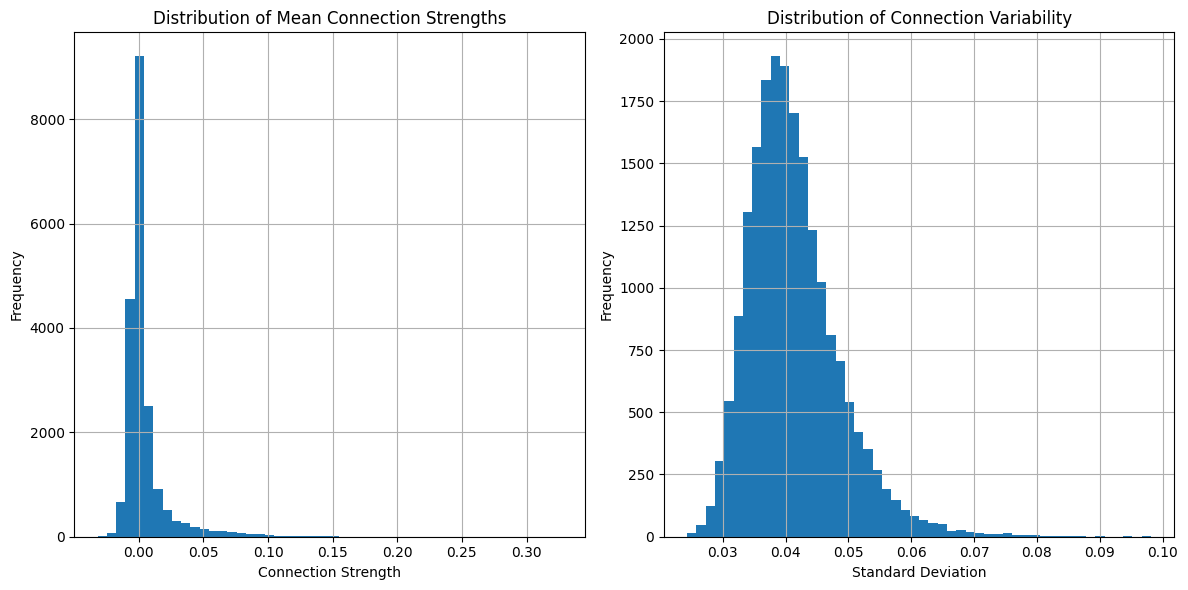

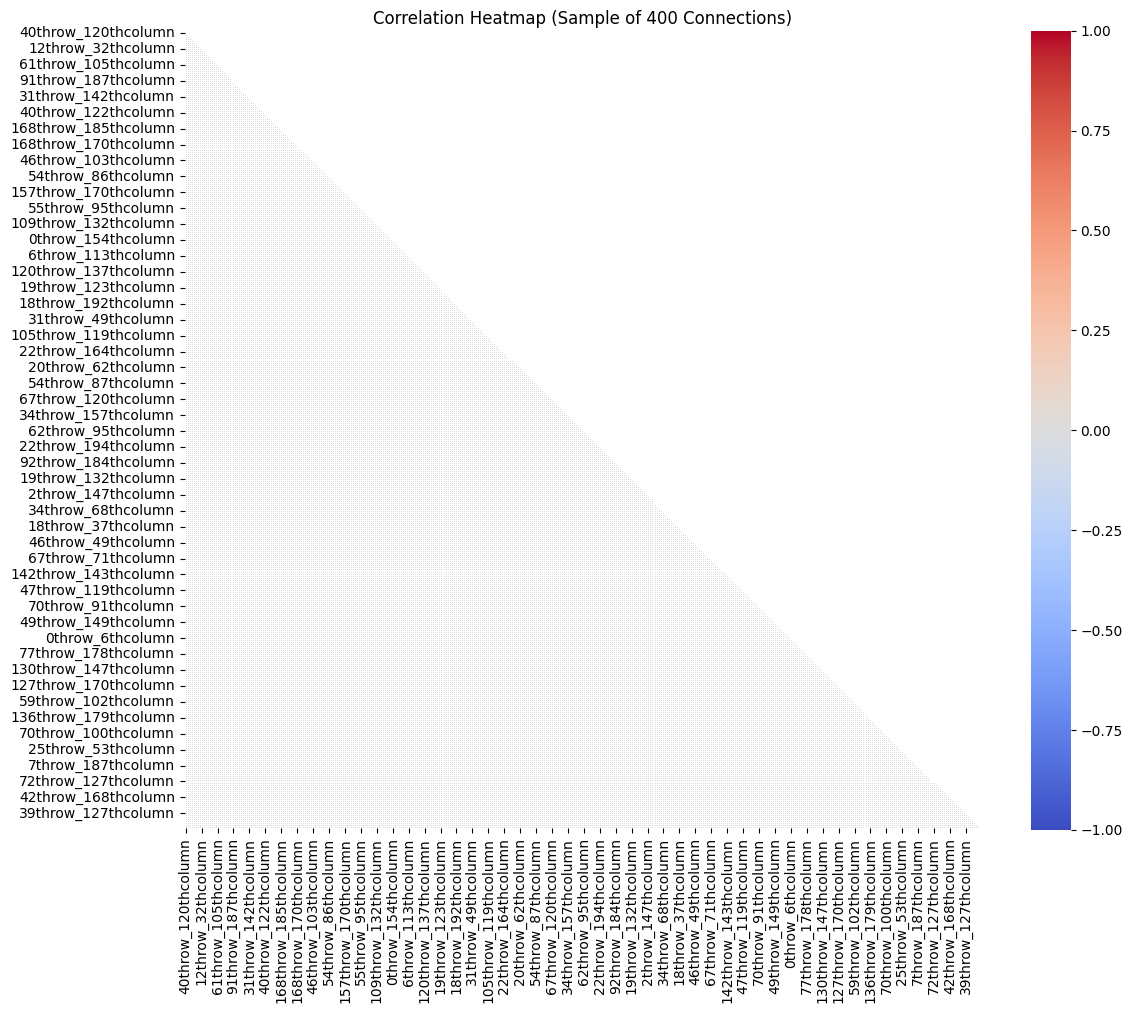

Connectome profiling completed in 1.76 seconds


In [68]:
cdata = profiler.profile_connectome(n_regions = 20)

In [66]:
cdata.sort_values(by='mean', ascending=False)

,mean,std,min,max,missing,missing_pct
26throw_129thcolumn,0.326986,0.087534,0.012173,0.739065,0,0.0
14throw_15thcolumn,0.232287,0.077650,-0.070338,0.615033,0,0.0
115throw_117thcolumn,0.218824,0.075662,-0.071439,0.573135,0,0.0
18throw_121thcolumn,0.212151,0.071182,-0.010498,0.530609,0,0.0
96throw_194thcolumn,0.206330,0.065661,-0.054948,0.501372,0,0.0
...,...,...,...,...,...,...
112throw_122thcolumn,-0.025405,0.049393,-0.293802,0.133942,0,0.0
13throw_122thcolumn,-0.026618,0.044823,-0.201557,0.246672,0,0.0
73throw_193thcolumn,-0.027431,0.040237,-0.152787,0.098861,0,0.0
19throw_112thcolumn,-0.031539,0.043132,-0.190346,0.125192,0,0.0


In [75]:
data.loc[:,['95throw_118thcolumn','ADHD_Outcome']].groupby('ADHD_Outcome').mean()

,95throw_118thcolumn
ADHD_Outcome,
0,-0.007949
1,-0.009963


In [76]:
(-0.007949+0.009963)/-0.009963

-0.2021479474054